In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
#import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True



In [2]:
path = Path('C:/Users/Mikhail/Desktop/Mushrooms_classification')

In [3]:
path.ls()

[WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Agaricus'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Amanita'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Boletus'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Cortinarius'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Entoloma'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Hygrocybe'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Lactarius'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/models'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Russula'),
 WindowsPath('C:/Users/Mikhail/Desktop/Mushrooms_classification/Suillus')]

In [3]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=(224),num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Agaricus',
  'Amanita',
  'Boletus',
  'Cortinarius',
  'Entoloma',
  'Hygrocybe',
  'Lactarius',
  'Russula',
  'Suillus'],
 9,
 5371,
 1342)

In [9]:
#classlist = ['Agaricus','Amanita','Boletus','Cortinarius','Entoloma','Hygrocybe','Lactarius','Russula','Suillus']

In [6]:
for cl in data.classes:
    print(cl)
    verify_images(path/cl, delete=True, max_workers=8)

Agaricus


Amanita


Boletus


Cortinarius


Entoloma


Hygrocybe


Lactarius


Russula


Suillus


In [5]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)



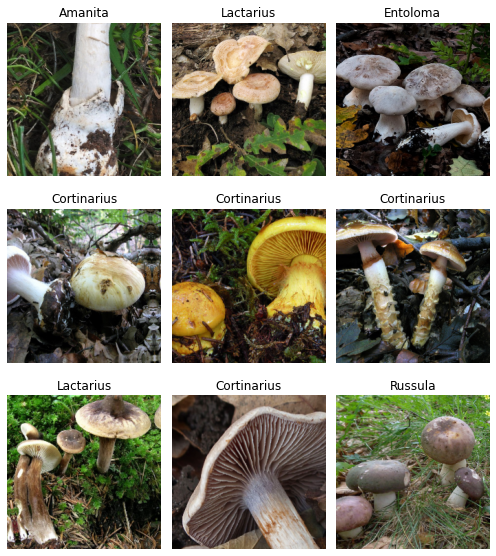

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
learn.fit_one_cycle(5)
   
    

epoch,train_loss,valid_loss,error_rate,time
0,1.664349,1.058792,0.292101,01:18
1,1.093137,0.785431,0.247392,01:17
2,0.761267,0.607943,0.200447,01:17
3,0.563401,0.533732,0.174367,01:17
4,0.448565,0.520575,0.171386,01:17


In [8]:
learn.save('stage-1')

In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


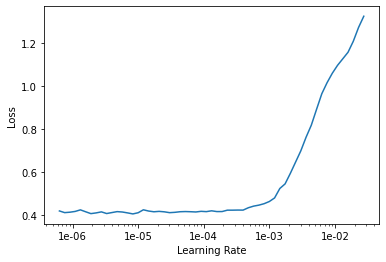

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(3, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.433392,0.492668,0.158718,01:19
1,0.311046,0.369282,0.125931,01:18
2,0.185941,0.338319,0.115499,01:18


In [14]:
learn.save('stage-2')

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

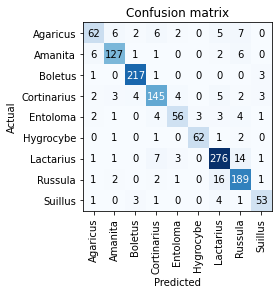

In [16]:
interp.plot_confusion_matrix()

In [19]:
from fastai.widgets import *

In [26]:
db = (ImageList.from_folder(path)
.split_none()
.label_from_folder()
.transform(get_transforms(), size=224)
.databunch())

In [27]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

learn_cln.load('C:/Users/Mikhail/Desktop/jupyter fast ai/MNIST/train/models/');

In [28]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [29]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())